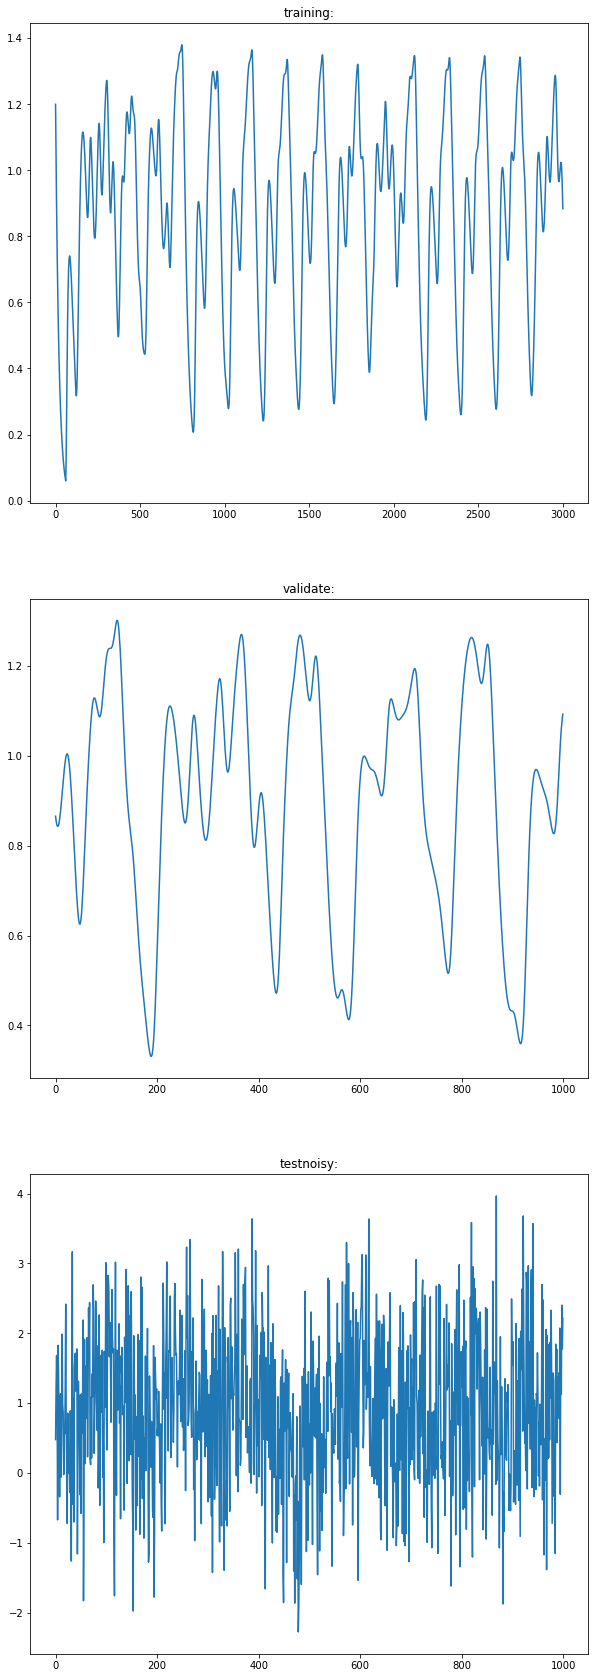

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 
import codecs
import textwrap
import numpy as np

testnoisy = np.loadtxt('testnoisy.txt')
training = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
x_train = np.arange(0,3000)
x_test = np.arange(0,1000) 
x_validate = np.arange(0,1000) 

#plot results
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(*[3,1,1])
ax.plot(x_train,training)
myTitle = 'training: ';
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[3,1,2])
ax.plot(x_validate,validate)
myTitle = 'validate: ';
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[3,1,3])
ax.plot(x_test,testnoisy)
myTitle = 'testnoisy: ';
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))
plt.show();


the least error is: 
 
0.00138460941573
 
the best lambda is: 
 
0.01
 
the best order is: 
 
18
 
the error under the w for testnoisy data:
 
1.7816139350971776
 
the error for order 4:
 
2.00605009908
 
the error for order 8:
 
1.81018316775
 
the error for order 30:
 
1.78486439351
 


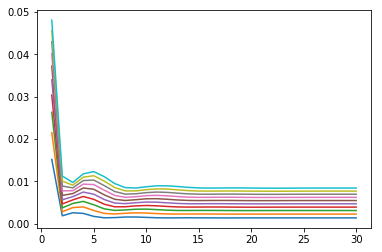

In [1]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
import codecs 
import textwrap 
import numpy as np

testnoisy = np.loadtxt('testnoisy.txt') 
training = np.loadtxt('training.txt') 
validate = np.loadtxt('validate.txt')#load data

order_upper = 30
N = 10
Er = np.arange(0.1,((N+1)*(order_upper)+1)/10,0.1)
Error = Er.reshape((N+1),order_upper)
#print(Error.shape)
l = np.arange(0,11,1)
E_lowest = np.arange(0,31,1)

for o in range(order_upper):
    
    order = o + 1
    Err = 0
    
    training_length = 3000 - order
    test_length = 1000 - order    #the size of set of data
    validate_length = 1000 - order
    
    x = np.arange(0.1,(training_length*order+1)/10,0.1)
    X =  x.reshape(training_length,order)
    
    v = np.arange(0.1,(validate_length*order+1)/10,0.1)
    V =  v.reshape(validate_length,order)
    
    for i in range(order):
        X[:,i] = training[i:training_length+i]
    for i in range(order):
        V[:,i] = validate[i:validate_length+i]
    X_w = training[order:3000]
    d_validate = validate[order:1000]
    
    for lamb in range(N + 1):
        I = np.identity(X.shape[1])
        z = X.T@X + ((lamb+1)/100)*np.identity(X.shape[1])
        W = np.linalg.inv(z)@X.T@X_w.T
        #print(W)
        X_predict = V@W.T
        #print(W)
        for i in range(validate_length):
            Err = Err + (X_predict[i]-d_validate[i])**2  
            #print((X_predict[i]-d_validate[i]))
                  
        Error[lamb,o] = math.sqrt(Err/(validate_length))
#print(Error.shape)
k0 = np.array(Error[0,:])
k1 = np.array(Error[1,:])
k2 = np.array(Error[2,:])
k3 = np.array(Error[3,:])
k4 = np.array(Error[4,:])
k5 = np.array(Error[5,:])
k6 = np.array(Error[6,:])
k7 = np.array(Error[7,:])
k8 = np.array(Error[8,:])
k9 = np.array(Error[9,:])

t = np.arange(1,order_upper+1,1)   
#print(k)
#print(t.size)
plt.plot(t,k0)
plt.plot(t,k1) 
plt.plot(t,k2) 
plt.plot(t,k3) 
plt.plot(t,k4) 
plt.plot(t,k5) 
plt.plot(t,k6) 
plt.plot(t,k7) 
plt.plot(t,k8) 
plt.plot(t,k9) 
#print(Error[5,2])

E = np.array(np.arange(0,10,1))

print("the least error is: ")
print(" ")
print(Error.min())
print(" ")

for i in range(10):
    for j in range(30):
        if Error[i,j] == Error.min():
            lamb_final = (i+1)/100
            print("the best lambda is: ")
            print(" ")
            print((i+1)/100)
            print(" ")
            print("the best order is: ")
            print(" ")
            order_final = j + 1
            print(j+1)
            print(" ")

training_length = 3000 - order_final
test_length = 1000 - order_final    #the size of set of data

test = np.arange(0.1,(test_length*order_final+1)/10,0.1)
Test =  test.reshape(test_length,order_final)

x_t = np.arange(0.1,(training_length*order_final+1)/10,0.1)
X_t =  x_t.reshape(training_length,order_final)
#print(X_t.shape)

for i in range(order_final):
    Test[:,i] = testnoisy[i:test_length+i]
for i in range(order_final):
    X_t[:,i] = training[i:training_length+i]
    
X_w_t = training[order_final:3000]
d_test = testnoisy[order_final:1000]

#print(X_w_t.shape)
#print(X_t.shape)
I_t = np.identity(X_t.shape[1])
z_t = X_t.T@X_t + (lamb_final)*np.identity(X_t.shape[1])
#print(z_t.shape)
W_t = np.linalg.inv(z_t)@X_t.T@X_w_t
#print(W)
X_test = Test@W_t.T
#print(d_test.shape)
Err_t = 0 

for i in range(test_length):
    Err_t = Err_t + (X_test[i]-d_test[i])**2  
                 
Error_final = math.sqrt(Err_t/(test_length))            
print("the error under the w for testnoisy data:")
print(" ")
print(Error_final)
print(" ")

ti = 0

Error_tt = np.zeros(3)
for k in np.array([4, 8, 30]):
    
    training_length = 3000 - k
    test_length = 1000 - k    #the size of set of data

    tes = np.arange(0.1,(test_length*k+1)/10,0.1)
    Tes =  tes.reshape(test_length,k)

    x_tt = np.arange(0.1,(training_length*k+1)/10,0.1)
    X_tt =  x_tt.reshape(training_length,k)

    for i in range(k):
        Tes[:,i] = testnoisy[i:test_length+i]
    for i in range(k):
        X_tt[:,i] = training[i:training_length+i]
    
    X_w_tt = training[k:3000]
    d_testt = testnoisy[k:1000]

    I_tt = np.identity(X_tt.shape[1])
    z_tt = X_tt.T@X_tt + (lamb_final)*np.identity(X_tt.shape[1])

    W_tt = np.linalg.inv(z_tt)@X_tt.T@X_w_tt
    X_testt = Tes@W_tt.T

    Err_tt = 0 

    for i in range(test_length):
        Err_tt = Err_tt + (X_testt[i]-d_testt[i])**2  
                 
    Error_tt[ti] = math.sqrt(Err_tt/(test_length)) 
    ti = ti + 1

print("the error for order 4:")
print(" ")
print(Error_tt[0])
print(" ")

print("the error for order 8:")
print(" ")
print(Error_tt[1])
print(" ")

print("the error for order 30:")
print(" ")
print(Error_tt[2])
print(" ")


the least error is: 
 
0.103519969991
 
the best step is: 
 
0.0001
 
the best order is: 
 
12
 
the error for order 4:
 
1.19095142371
 
the error for order 8:
 
1.62281852657
 
the error for order 30:
 
1.96636067867
 


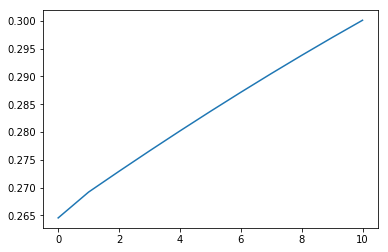

In [11]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
import codecs 
import textwrap 
import numpy as np

testnoisy = np.loadtxt('testnoisy.txt') 
training = np.loadtxt('training.txt') 
validate = np.loadtxt('validate.txt')#load data

order_upper = 30
N = 10
Er = np.arange(0.1,((N+1)*(order_upper)+1)/10,0.1)
Error = Er.reshape((N+1),order_upper)
l = np.arange(0,11,1)
E_lowest = np.arange(0,31,1)
k = 10000

for o in range(order_upper):
    
    order = o + 1
    Err = 0
    W = np.matrix(np.zeros(order))
    
    training_length = 3000 - order
    test_length = 1000 - order    #the size of set of data
    validate_length = 1000 - order
    
    x = np.arange(0.1,(training_length*order+1)/10,0.1)
    X =  x.reshape(training_length,order)
    
    v = np.arange(0.1,(validate_length*order+1)/10,0.1)
    V =  v.reshape(validate_length,order)
    
    for i in range(order):
        X[:,i] = training[i:training_length+i]
    for i in range(order):
        V[:,i] = validate[i:validate_length+i]
    X_w_t = training[order:3000]
    d_validate_t = validate[order:1000]
    
    X_w = X_w_t.reshape((3000-order),1)
    d_validate = d_validate_t.reshape((1000-order),1)
    
    #print(d_validate.shape)
    
    for step in range(N + 1):
        for j in range(training_length):
            E_s = W@X[j,:].T - X_w[j].T
            reg = ((step+1)/k)*(E_s@np.matrix(X[j,:]))
            W = W - reg
        X_predict = V@W.T
        #print(E_s)
        for i in range(validate_length):
            Err = Err + (X_predict[i]-d_validate[i])**2           
        Error[step,o] = math.sqrt(Err/(validate_length))         
        #print(E_s)
k0 = np.array(Error[:,4])

t = np.arange(0,N+1,1)   

plt.plot(t,k0)


print("the least error is: ")
print(" ")
print(Error.min())
print(" ")

for i in range(10):
    for j in range(30):
        if Error[i,j] == Error.min():
            step_final = (i+1)/k
            print("the best step is: ")
            print(" ")
            print((i+1)/k)
            print(" ")
            print("the best order is: ")
            print(" ")
            order_final = j + 1
            print(j+1)
            print(" ")

ti = 0

Error_tt = np.zeros(3)
for k in np.array([4, 8, 30]):
    
    W = np.matrix(np.zeros(k))
    training_length = 3000 - k
    test_length = 1000 - k    #the size of set of data

    t = np.arange(0.1,(test_length*k+1)/10,0.1)
    T =  t.reshape(test_length,k)

    x_tt = np.arange(0.1,(training_length*k+1)/10,0.1)
    X_tt =  x_tt.reshape(training_length,k)

    for i in range(k):
        X_tt[:,i] = training[i:training_length+i]
    for i in range(k):
        T[:,i] = testnoisy[i:test_length+i]
        
    X_w_t = training[k:3000]
    d_test_t = testnoisy[k:1000]
    
    X_w = X_w_t.reshape((3000-k),1)
    d_test = d_test_t.reshape((1000-k),1)
        
    for j in range(training_length):
        E_s = W@X_tt[j,:].T - X_w[j].T
        reg = (step_final)*(E_s@np.matrix(X_tt[j,:]))
        W = W - reg
    X_predict = T@W.T
        #print(E_s)
    for i in range(test_length):
        Err = Err + (X_predict[i]-d_test[i])**2           
    Error_tt[ti] = math.sqrt(Err/(test_length))
    ti = ti + 1
    
        
    
print("the error for order 4:")
print(" ")
print(Error_tt[0])
print(" ")

print("the error for order 8:")
print(" ")
print(Error_tt[1])
print(" ")

print("the error for order 30:")
print(" ")
print(Error_tt[2])
print(" ")
